<a href="https://colab.research.google.com/github/dmburns1729/Project-2/blob/main/Project_2_Part_4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Project 2 - Part 4

---



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from imblearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.ticker as mtick

from sklearn import set_config
set_config(display='diagram')

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, f1_score, accuracy_score, classification_report

from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [6]:
df_clean=df.copy()

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [8]:
df_clean.duplicated().sum()

0

In [9]:
#Drop unneeded ID column
df_clean = df_clean.drop(columns = 'ID')


In [10]:
df_clean.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [11]:
df_clean['CREDIT_SCORE'].value_counts()

0.629027    1
0.618094    1
0.396540    1
0.578306    1
0.633275    1
           ..
0.309272    1
0.847325    1
0.432080    1
0.527041    1
0.435225    1
Name: CREDIT_SCORE, Length: 9018, dtype: int64

In [12]:
df_clean['ANNUAL_MILEAGE'].value_counts()

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [13]:
df_clean['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [14]:
# Check categorical columns for consistancy
# select only object columns
categoricals = df_clean.select_dtypes(include='object')

# check value counts for each object column
for col in categoricals.columns:
  print(col)
  print(categoricals[col].value_counts(), '\n')

AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64 

GENDER
female    5010
male      4990
Name: GENDER, dtype: int64 

RACE
majority    9012
minority     988
Name: RACE, dtype: int64 

DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64 

EDUCATION
high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64 

INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64 

VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64 

VEHICLE_TYPE
sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64 



In [15]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

age_ordinal = {'16-25':0, '26-39':1,'40-64':2,'65+':3 }
df_clean['AGE'] = df_clean['AGE'].replace(age_ordinal)
df_clean['AGE'].value_counts()

1    3063
2    2931
0    2016
3    1990
Name: AGE, dtype: int64

In [16]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

gender_ordinal = {'male':0, 'female':1 }
df_clean['GENDER'] = df_clean['GENDER'].replace(gender_ordinal)
df_clean['GENDER'].value_counts()

1    5010
0    4990
Name: GENDER, dtype: int64

In [17]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

race_ordinal = {'majority':0, 'minority':1}
df_clean['RACE'] = df_clean['RACE'].replace(race_ordinal)
df_clean['RACE'].value_counts()

0    9012
1     988
Name: RACE, dtype: int64

In [18]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

experience_ordinal = {'0-9y':0, '10-19y':1, '20-29y':2, '30y+':3}
df_clean['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].replace(experience_ordinal)
df_clean['DRIVING_EXPERIENCE'].value_counts()




0    3530
1    3299
2    2119
3    1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [19]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

# I am going to assume 'none' means no eduction not 'missing value'

education_ordinal = {'none':0, 'high school':1, 'university':2}
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace(education_ordinal)
df_clean['EDUCATION'].value_counts()


#EDUCATION
#high school    4157
#university     3928
#none           1915
#ame: EDUCATION, dtype: int64 



1    4157
2    3928
0    1915
Name: EDUCATION, dtype: int64

In [20]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

income_ordinal = {'poverty':0, 'working class':1, 'middle class':2, 'upper class':3}
df_clean['INCOME'] = df_clean['INCOME'].replace(income_ordinal)
df_clean['INCOME'].value_counts()


3    4336
2    2138
0    1814
1    1712
Name: INCOME, dtype: int64

In [21]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_year_ordinal = {'before 2015':0, 'after 2015':1}
df_clean['VEHICLE_YEAR'] = df_clean['VEHICLE_YEAR'].replace(vehicle_year_ordinal)
df_clean['VEHICLE_YEAR'].value_counts()

0    6967
1    3033
Name: VEHICLE_YEAR, dtype: int64

In [22]:
# I am going to encode the object types. I can do this before the test/train split because the numeric encoding 
# does not depend on information from the test data, so does not cause data leakage. 

vehicle_type_ordinal = {'sedan':0, 'sports car':1}
df_clean['VEHICLE_TYPE'] = df_clean['VEHICLE_TYPE'].replace(vehicle_type_ordinal)
df_clean['VEHICLE_TYPE'].value_counts()

0    9523
1     477
Name: VEHICLE_TYPE, dtype: int64

In [23]:
df_clean['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [24]:
df_clean['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [25]:
df_clean['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [26]:
df_clean['ANNUAL_MILEAGE'].value_counts()

 

11000.0    1253
12000.0    1218
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [27]:
df_clean['OUTCOME'].value_counts()


0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [28]:
# Inbalanced data!  May need to address

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [30]:
df_clean

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,0,0,0,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,0,1,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,0,0,0,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,1,0,0,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9996,1,1,0,1,0,2,0.522231,1.0,1,0.0,1.0,32765,NaN,0,1,0,0,0.0
9997,1,0,0,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.0,0,0,0,0,0.0
9998,1,1,0,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.0,0,2,0,1,1.0


In [31]:
df_clean.describe()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.489500,0.501000,0.098800,1.069300,1.20130,1.899600,0.515813,0.697000,0.303300,0.498200,0.688800,19864.548400,11697.003207,0.047700,1.482900,0.23920,1.056300,0.313300
std,1.025278,0.500024,0.298408,0.990452,0.73745,1.149109,0.137688,0.459578,0.459707,0.500022,0.463008,18915.613855,2818.434528,0.213141,2.241966,0.55499,1.652454,0.463858
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.417191,0.000000,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.00000,2.000000,0.525033,1.000000,0.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,2.000000,2.00000,3.000000,0.618312,1.000000,1.000000,1.000000,1.000000,32765.000000,14000.000000,0.000000,2.000000,0.00000,2.000000,1.000000
max,3.000000,1.000000,1.000000,3.000000,2.00000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,92101.000000,22000.000000,1.000000,22.000000,6.00000,15.000000,1.000000


In [32]:
df_clean['SPEEDING_VIOLATIONS'].value_counts()

# Look at speedy with 22 speeding tickets!


0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

In [ ]:
sns.histplot(data=df_clean, x = df_clean['SPEEDING_VIOLATIONS'])

CPU times: user 239 ms, sys: 94.2 ms, total: 333 ms
Wall time: 274 ms


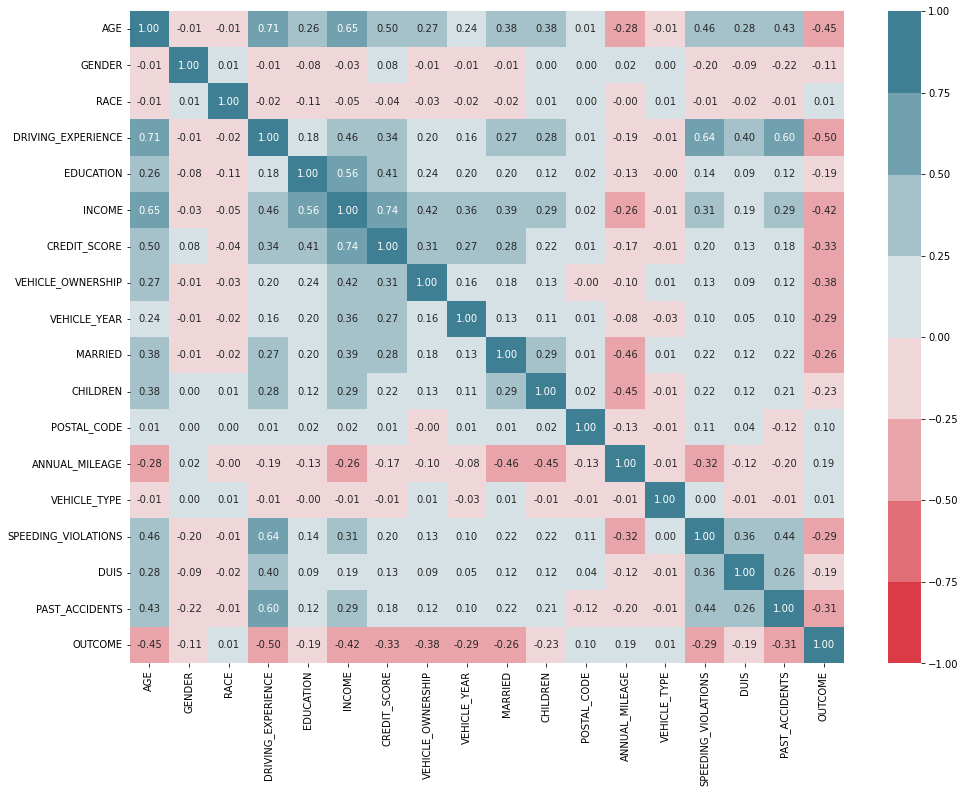

In [33]:
%%time
corr = df_clean.corr()
plt.figure(figsize = (16,12));
sns.heatmap(corr, cmap=sns.diverging_palette(10, 220, n=8), annot = True, vmin=-1, vmax=1, center=0,fmt='.2f');

# Analysis of the correlation heat map

There are a few interesting facts about the correlations in the data.  First, age and driving experience are negatively correlated with crashing your car.  Younger, less experienced drivers crash more often. Not a big surprise. 

Interestingly, as you get older, your income, credit score, chance of being married, children, etc all go up.  However, so does your number of speeding violations, DUIs, and past accidents.  I guess this makes sense if this is a lifetime record but the insurance company really should limit these items to a limited look back - i.e. violations drop off your record after a certain amount of years.  It doesn't look like that is what they did here.  However, just the fact that some people have fewer accidents when they get older should help us out.  

Gender, race, and vehicle type seem to have little correlation with wrecking your car.  

CREDIT_SCORE is highly correlated with income. There are also missing values for CREDIT_SCORE.  For the regression and clustering, I will impute the values by grouping by income.  Of course, to prevent data leakage, I will do this **after** the test/train split.

Annual mileage is weakly correlations with a number of factors and also has missing values.  I am just going to impute it based on the mean.  As with CREDIT_SCORE I will impute the values after the split. 

In [34]:
df_clean

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,0,0,0,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,0,1,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,0,0,0,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,1,0,0,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.0,0,0,0,1,0.0
9996,1,1,0,1,0,2,0.522231,1.0,1,0.0,1.0,32765,NaN,0,1,0,0,0.0
9997,1,0,0,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.0,0,0,0,0,0.0
9998,1,1,0,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.0,0,2,0,1,1.0


In [35]:
df_viz = df_clean.copy()

In [36]:
df_viz.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [37]:
# Loop through index values of the dataframe

def fill_credit_score(data_frame):

  for ind in data_frame.index:

    x = data_frame.loc[ind, 'CREDIT_SCORE']

    if np.isnan(x) == True:

      # Create a filter to select the correct data based on AGE and INCOME
      # I used the entire data set instead of just the sample to be filled.
      # In case a 

      age_filter = data_frame['AGE'] == data_frame.loc[ind, 'AGE']
      income_filter = data_frame['INCOME'] == data_frame.loc[ind, 'INCOME']

      mean_credit_score_df = round(data_frame.loc[age_filter & income_filter, 'CREDIT_SCORE'].mean(),3)

      # Assign mean_credit_score to the 'CREDIT_SCORE' column of this row
      # To correct for data with one sample or with all missing values for credit score
      # we will create an if/else statement and fill with test data
      # This will cause data leakage but will not result in model failure

      if np.isnan(mean_credit_score_df) == False:
        data_frame.loc[ind, 'CREDIT_SCORE'] = mean_credit_score_df
      else:
        age_filter = df_clean['AGE'] == df_clean.loc[ind, 'AGE']
        income_filter = df_clean['INCOME'] == df_clean.loc[ind, 'INCOME']    
      
        mean_credit_score_clean = round(df_clean.loc[age_filter & income_filter, 'CREDIT_SCORE'].mean(),3)
      
        data_frame.loc[ind, 'CREDIT_SCORE'] = mean_credit_score_clean


In [38]:
fill_credit_score(df_viz)

In [39]:
# Loop through index values of the dataframe

def fill_mileage(data_frame):


  for ind in data_frame.index:

    x = data_frame.loc[ind, 'ANNUAL_MILEAGE']

    if np.isnan(x) == True:

      # Create a filter to select the correct data

      age_filter = data_frame['AGE'] == data_frame.loc[ind, 'AGE']
      children_filter = data_frame['CHILDREN'] == data_frame.loc[ind, 'CHILDREN']
      speeding_violations_filter = data_frame['SPEEDING_VIOLATIONS'] == data_frame.loc[ind, 'SPEEDING_VIOLATIONS']



      mean_mileage_df = round(data_frame.loc[age_filter & children_filter & speeding_violations_filter, 'ANNUAL_MILEAGE'].mean(),3)

      # Assign mean_mileage to the 'ANNUAL_MILEAGE' column of this row
  
      if np.isnan(mean_mileage_df) == False:
        # Assign mean_credit_score to the 'CREDIT_SCORE' column of this row
        data_frame.loc[ind, 'ANNUAL_MILEAGE'] = mean_mileage_df

      else:
        age_filter = df_clean['AGE'] == df_clean.loc[ind, 'AGE']
        children_filter = df_clean['CHILDREN'] == df_clean.loc[ind, 'CHILDREN']

        mean_mileage_clean = round(df_clean.loc[age_filter & children_filter, 'ANNUAL_MILEAGE'].mean(),3)
      
        data_frame.loc[ind, 'ANNUAL_MILEAGE'] = mean_mileage_clean

In [40]:
fill_mileage(df_viz)

In [41]:
df_viz.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [42]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [43]:
df_viz

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.000,0,0,0,0,0.0
1,0,0,0,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.000,0,0,0,0,1.0
2,0,1,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.000,0,0,0,0,0.0
3,0,0,0,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.000,0,0,0,0,0.0
4,1,0,0,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.000,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.000,0,0,0,1,0.0
9996,1,1,0,1,0,2,0.522231,1.0,1,0.0,1.0,32765,11282.178,0,1,0,0,0.0
9997,1,0,0,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.000,0,0,0,0,0.0
9998,1,1,0,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.000,0,2,0,1,1.0


# Data Visualizations

Due to all of the categorical data in this dataset, making multivariate visualizations is going to be difficult.  I will choose the most relavent.

CPU times: user 2min 33s, sys: 11.8 s, total: 2min 45s
Wall time: 2min 34s


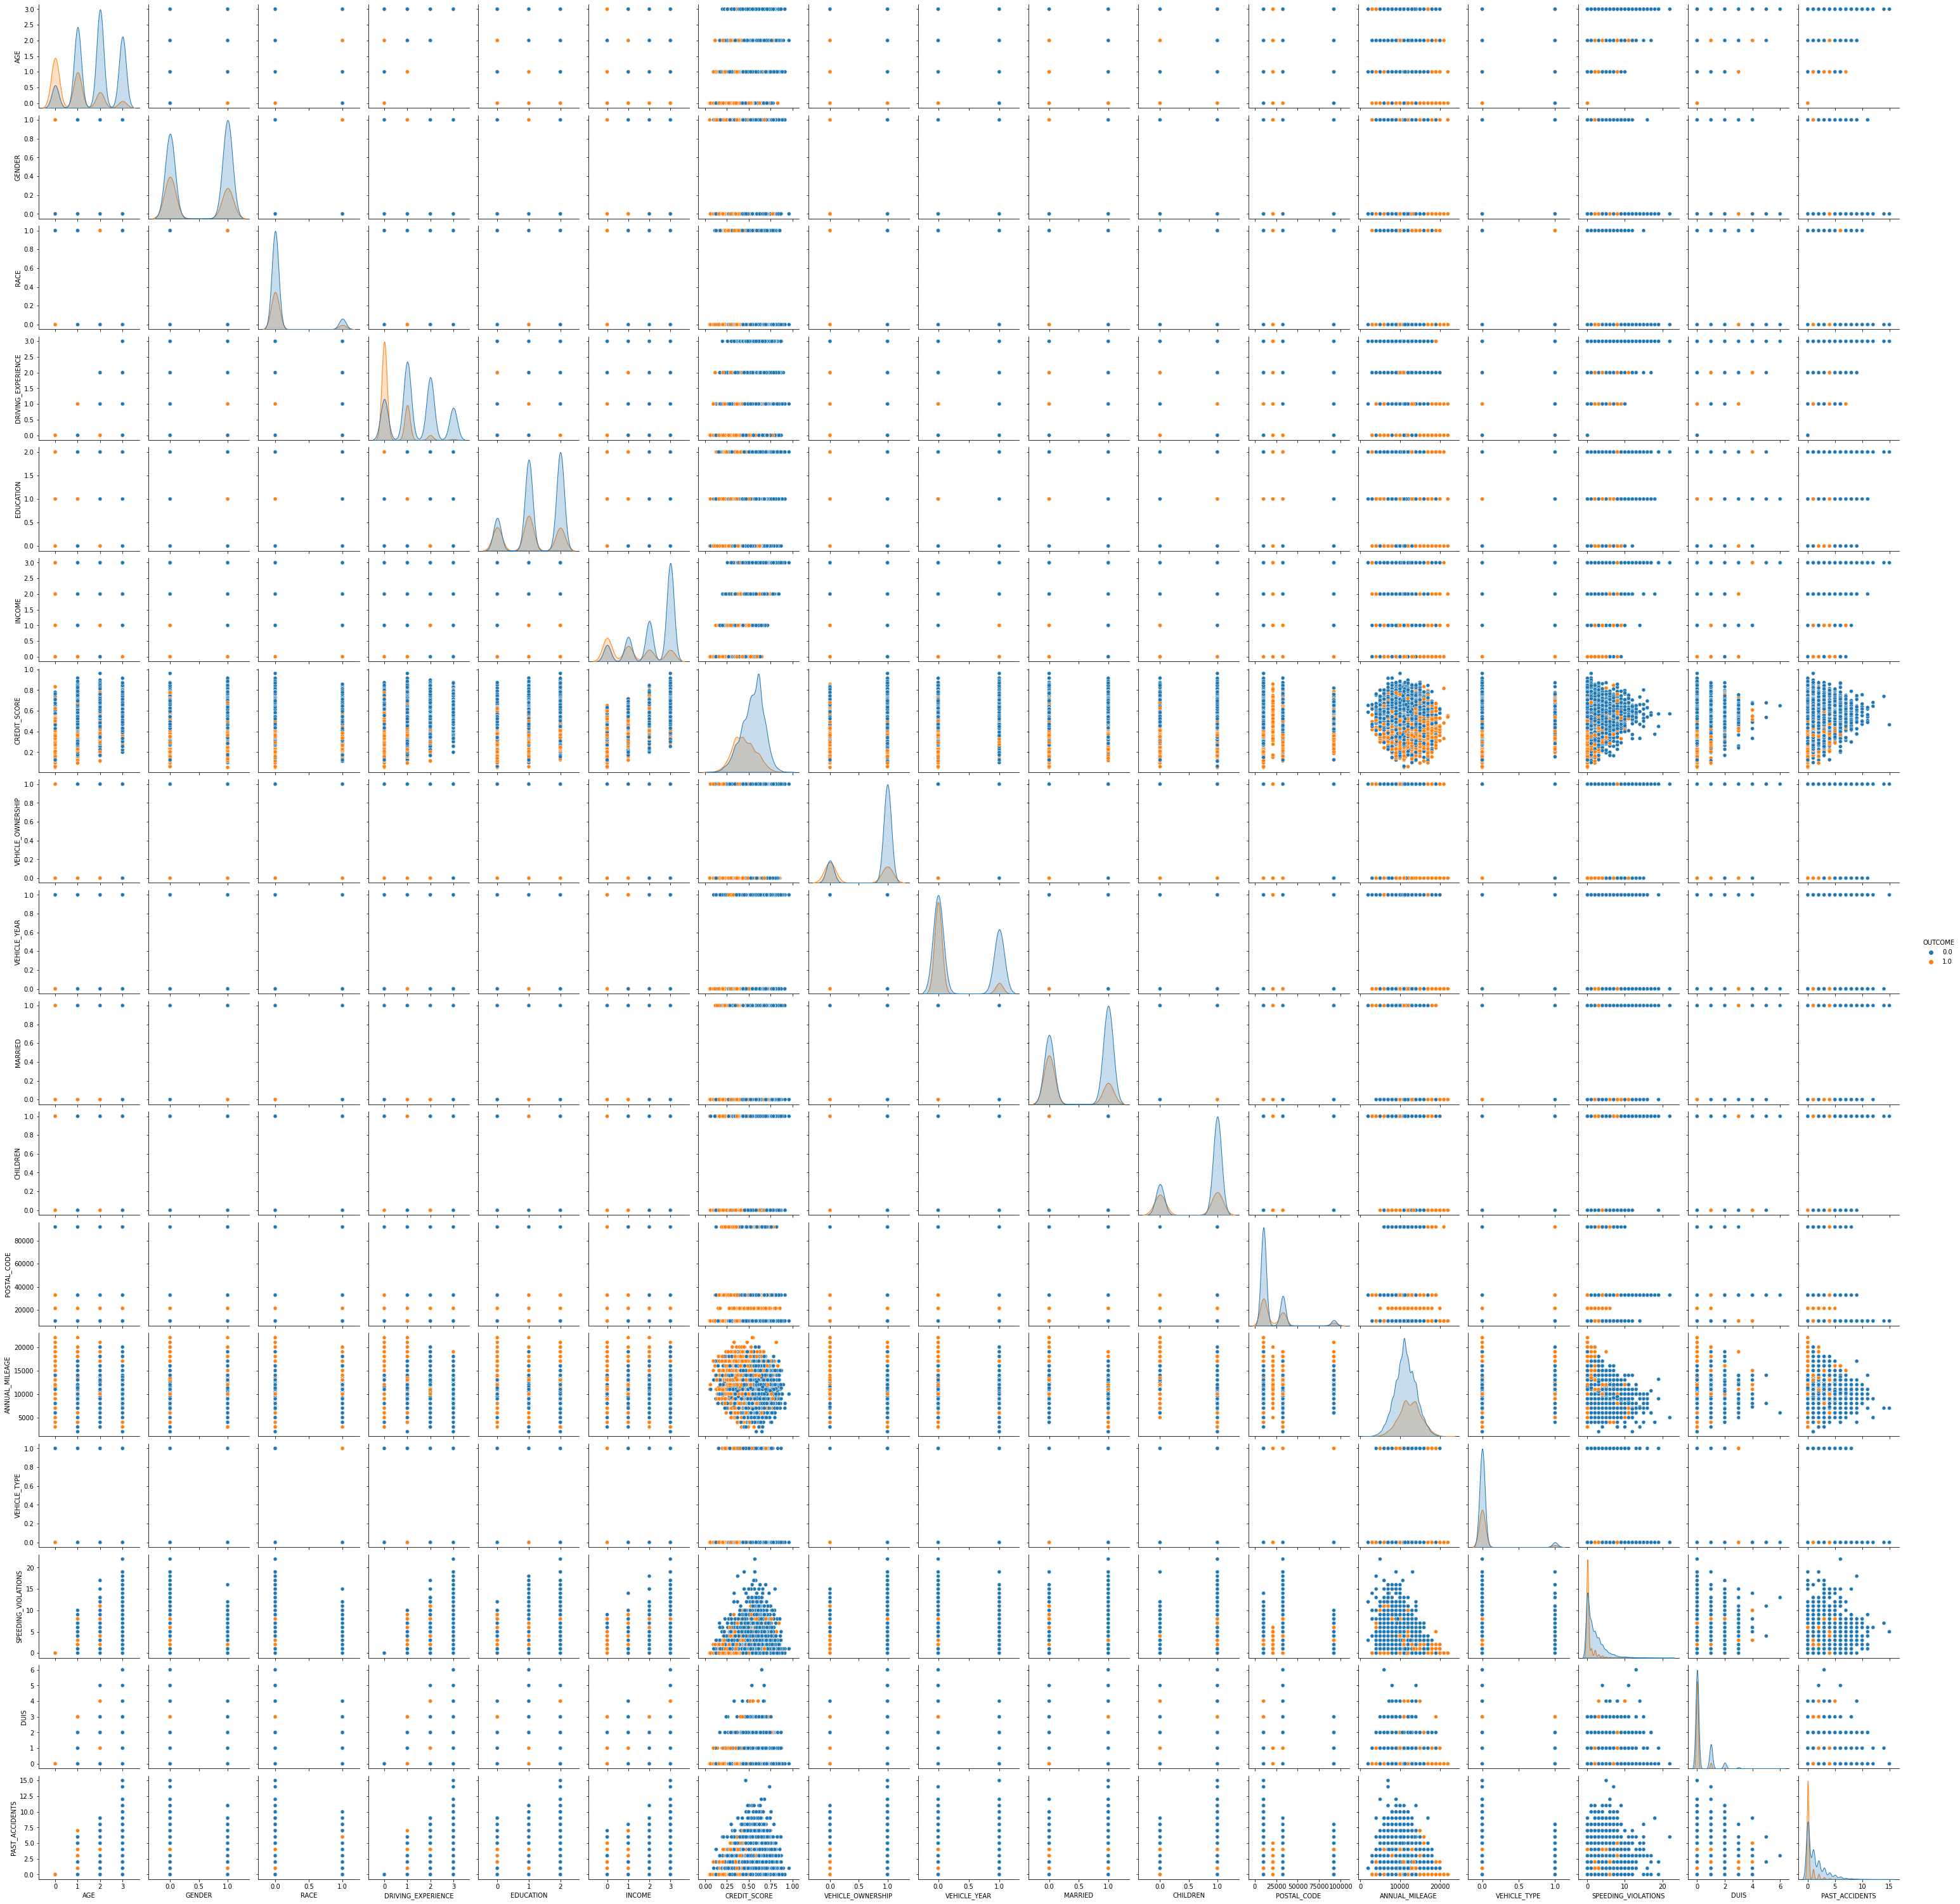

In [44]:
%%time
sns.pairplot(df_viz, hue = "OUTCOME");

# Please note that the diagonal is a univariate plot for each data set.
# Every plot not on the diagnal is a multivariate visualization

In [45]:
outcome = {0:'No claim', 1:'Crashed the car'}
df_viz['OUTCOME'] = df_viz['OUTCOME'].replace(outcome)
df_viz['OUTCOME'].value_counts()



No claim           6867
Crashed the car    3133
Name: OUTCOME, dtype: int64

In [46]:
age = {0: '16-25', 1:'26-39', 2:'40-64', 3:'65+'}

df_viz_bar = df_viz.copy()

df_viz_bar['AGE'] = df_clean['AGE'].replace(age)
df_viz_bar['AGE'].value_counts()

26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

In [47]:
for ind in df_viz_bar.index:

  # Create a filter to select the correct data

  age_filter = df_viz_bar['AGE'] == df_viz_bar.loc[ind, 'AGE']
  crash_filter = df_viz_bar['OUTCOME'] == df_viz_bar.loc[ind, 'OUTCOME']

  average_count_age = len(df_viz_bar.loc[age_filter & crash_filter]) / len(df_viz_bar['AGE'])

  # Assign average_count to a new 'average_count' column of this row
  
  df_viz_bar.loc[ind, 'average_count_age'] = average_count_age

df_viz_bar    

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,average_count_age
0,65+,1,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.000,0,0,0,0,No claim,0.1794
1,16-25,0,0,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.000,0,0,0,0,Crashed the car,0.1448
2,16-25,1,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.000,0,0,0,0,No claim,0.0568
3,16-25,0,0,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.000,0,0,0,0,No claim,0.0568
4,26-39,0,0,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.000,0,2,0,1,Crashed the car,0.1032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,1,0,1,2,3,0.582787,1.0,0,0.0,0.0,10238,16000.000,0,0,0,1,No claim,0.2031
9996,26-39,1,0,1,0,2,0.522231,1.0,1,0.0,1.0,32765,11282.178,0,1,0,0,No claim,0.2031
9997,26-39,0,0,0,1,2,0.470940,1.0,0,0.0,1.0,10238,14000.000,0,0,0,0,No claim,0.2031
9998,26-39,1,0,1,1,0,0.364185,0.0,0,0.0,1.0,10238,13000.000,0,2,0,1,Crashed the car,0.1032


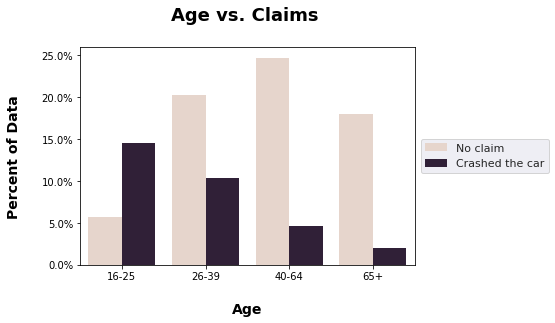

In [48]:

order_age=['16-25','26-39','40-64','65+']

sns.barplot(data=df_viz_bar, x="AGE", y='average_count_age', order=order_age, palette="ch:.10", hue='OUTCOME');
sns.set(style="darkgrid");

# Title and labels
plt.title('Age vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nAge', fontsize = 14, weight='bold');
plt.ylabel('Percent of Data\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.legend(bbox_to_anchor=(1.4, .5), loc='center right', borderaxespad=0);


##Explanation of the chart

Age is highly correlated with whether or not someone is going to have an accident resulting in an insurance claim

In [49]:
exp = {0:'0-9y',1: '10-19y', 2:'20-29y', 3:'30y+'}
df_viz_bar['DRIVING_EXPERIENCE'] = df_clean['DRIVING_EXPERIENCE'].replace(exp)
df_viz_bar['DRIVING_EXPERIENCE'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [50]:
for ind in df_viz_bar.index:

  # Create a filter to select the correct data

  experience_filter = df_viz_bar['DRIVING_EXPERIENCE'] == df_viz_bar.loc[ind, 'DRIVING_EXPERIENCE']
  crash_filter = df_viz_bar['OUTCOME'] == df_viz_bar.loc[ind, 'OUTCOME']

  average_count_exp = len(df_viz_bar.loc[experience_filter & crash_filter]) / len(df_viz_bar['DRIVING_EXPERIENCE'])

  # Assign average_count to a new 'average_count' column of this row
  
  df_viz_bar.loc[ind, 'average_count_exp'] = average_count_exp

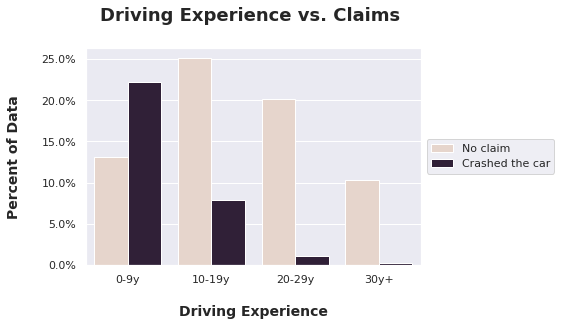

In [51]:
order_exp=['0-9y','10-19y','20-29y','30y+']

sns.barplot(data=df_viz_bar, x="DRIVING_EXPERIENCE", y='average_count_exp', order=order_exp, palette="ch:.10", hue='OUTCOME');
sns.set(style="darkgrid");

# Title and labels
plt.title('Driving Experience vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nDriving Experience', fontsize = 14, weight='bold');
plt.ylabel('Percent of Data\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.legend(bbox_to_anchor=(1.4, .5), loc='center right', borderaxespad=0);

In [52]:
outcome = {'No claim':0, 'Crashed the car':1}
df_viz_bar['OUTCOME'] = df_viz['OUTCOME'].replace(outcome)
df_viz_bar['OUTCOME'].value_counts()




0    6867
1    3133
Name: OUTCOME, dtype: int64

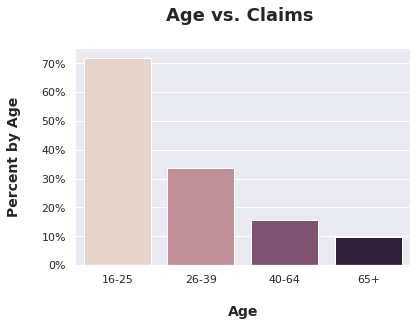

In [53]:
order_age=['16-25','26-39','40-64','65+']

sns.barplot(data=df_viz_bar, x="AGE", y='OUTCOME', order=order_age, palette="ch:.10", ci=None);
sns.set(style="darkgrid");

# Title and labels
plt.title('Age vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nAge', fontsize = 14, weight='bold');
plt.ylabel('Percent by Age\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

#plt.legend(bbox_to_anchor=(1.4, .5), loc='center right', borderaxespad=0);


Age is highly correlated with having an insurance claim

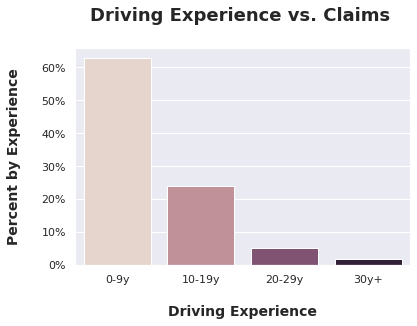

In [54]:
order_exp=['0-9y','10-19y','20-29y','30y+']

sns.barplot(data=df_viz_bar, x="DRIVING_EXPERIENCE", y='OUTCOME', order=order_exp, palette="ch:.10", ci=None);
sns.set(style="darkgrid");

# Title and labels
plt.title('Driving Experience vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nDriving Experience', fontsize = 14, weight='bold');
plt.ylabel('Percent by Experience\n', fontsize = 14, weight='bold');
current_values = plt.gca().get_yticks();
#plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

##Explanation of the chart

Driving experience is highly correlated with whether or not someone is going to have an accident resulting in an insurance claim.  Age and driving experience are also highly correlated

In [55]:
exp = {0:"Don't Own",1: 'Own'}
df_viz['VEHICLE_OWNERSHIP'] = df_clean['VEHICLE_OWNERSHIP'].replace(exp)
df_viz['VEHICLE_OWNERSHIP'].value_counts()

Own          6970
Don't Own    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

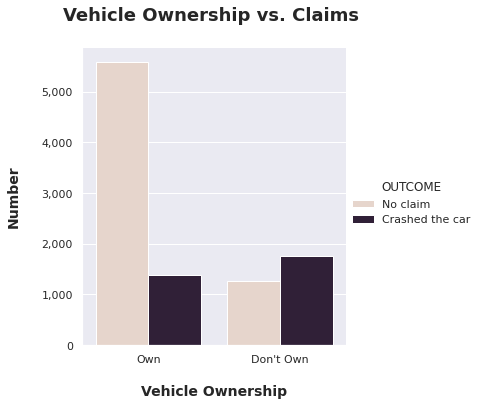

In [56]:
sns.catplot(data=df_viz, x="VEHICLE_OWNERSHIP", kind="count",hue="OUTCOME", palette="ch:.10");
sns.set(style="darkgrid")
# Title and labels
plt.title('Vehicle Ownership vs. Claims \n', fontsize = 18, weight='bold');
plt.xlabel('\nVehicle Ownership', fontsize = 14, weight='bold');
plt.ylabel('Number\n', fontsize = 14, weight='bold');

current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values]);


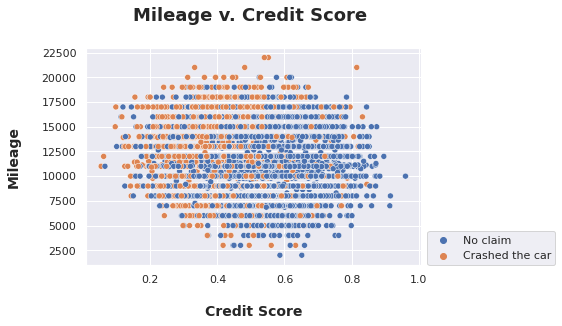

In [57]:
fig = plt.figure(1)
sns.set(style="darkgrid")
ax = sns.scatterplot(data = df_viz, x = 'CREDIT_SCORE', y = 'ANNUAL_MILEAGE', hue = 'OUTCOME')
ax.legend(bbox_to_anchor=[1,1]);


# Title and labels
plt.title('Mileage v. Credit Score \n', fontsize = 18, weight='bold');
plt.xlabel('\nCredit Score', fontsize = 14, weight='bold');
plt.ylabel('Mileage\n', fontsize = 14, weight='bold');
plt.legend(loc=(1.02,0));



# Classifying and Segmenting




In [168]:
df_ml = df_clean.copy()

In [170]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [171]:
df_ml.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,1,0,0,1,3,0.629027,1.0,1,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,0,0,0,0,0,0,0.357757,0.0,0,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,0,1,0,0,1,1,0.493146,1.0,0,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,0,0,0,0,2,1,0.206013,1.0,0,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,1,0,0,1,0,1,0.388366,1.0,0,0.0,0.0,32765,12000.0,0,2,0,1,1.0


In [172]:
# split X and y, you are predicting weight
X = df_ml.drop(columns=['OUTCOME'])
y = df_ml['OUTCOME']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
                                                    

In [173]:
X_train.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           745
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         704
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
dtype: int64

In [174]:
fill_credit_score(X_train)
fill_credit_score(X_test)

fill_mileage(X_train)
fill_mileage(X_test)

In [175]:
X_train.isna().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

In [176]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(X_train)

# Transform the X_train and the X_test

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_transformed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_transformed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_transformed.dtype)
print('All data in X_test_processed are', X_test_transformed.dtype)
print('\n')
print('shape of data is', X_train_transformed.shape)
print('\n')
X_train_transformed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (7500, 17)




array([[ 0.49446627, -0.9989339 , -0.32911972, ..., -0.65929569,
        -0.43258126, -0.64327778],
       [-1.45122996,  1.00106724, -0.32911972, ..., -0.65929569,
        -0.43258126, -0.64327778],
       [ 0.49446627, -0.9989339 , -0.32911972, ..., -0.65929569,
        -0.43258126,  1.14736308],
       ...,
       [ 1.46731438,  1.00106724, -0.32911972, ..., -0.65929569,
        -0.43258126,  0.55048279],
       [ 0.49446627, -0.9989339 , -0.32911972, ..., -0.21514607,
        -0.43258126,  2.34112366],
       [-1.45122996, -0.9989339 , -0.32911972, ..., -0.65929569,
        -0.43258126, -0.64327778]])

In [177]:
# define the evaluate_classiffication function here.  

def evaluate_classiffication(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)

  ## Print classification report for the test data 
  print('---'*20)
  print(f"CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))
  plt.grid(False)

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5144
         1.0       0.77      0.72      0.74      2356

    accuracy                           0.84      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.84      0.84      0.84      7500



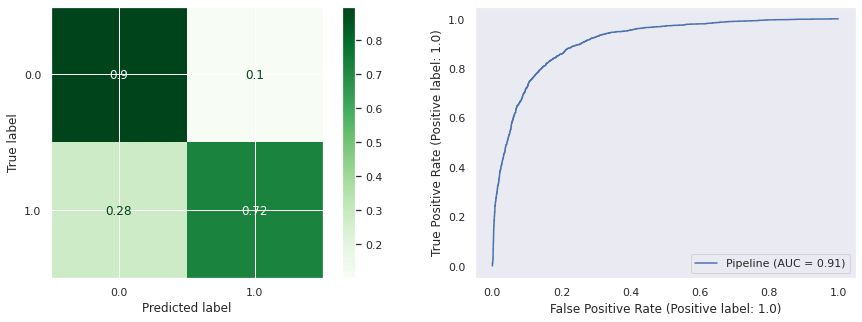

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1723
         1.0       0.76      0.72      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



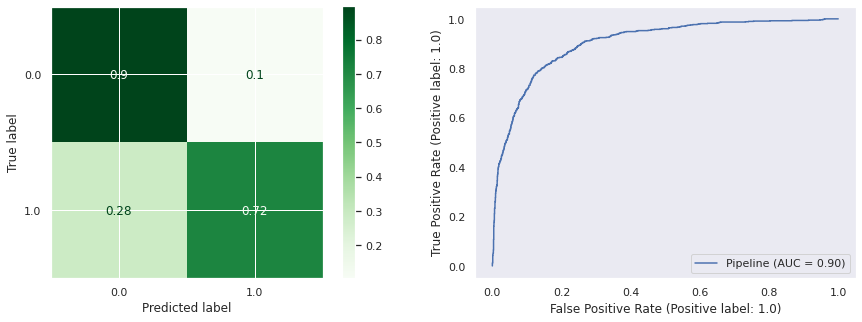

CPU times: user 974 ms, sys: 391 ms, total: 1.37 s
Wall time: 1.01 s


In [178]:
%%time

# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg_pipe = make_pipeline(preprocessor, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      1723
         1.0       0.66      0.84      0.74       777

    accuracy                           0.82      2500
   macro avg       0.79      0.82      0.80      2500
weighted avg       0.84      0.82      0.82      2500



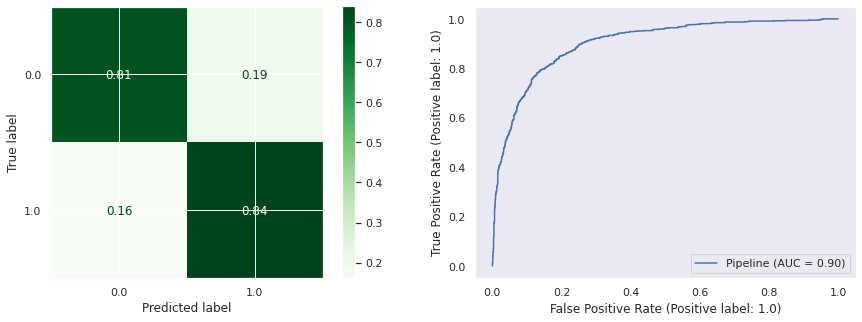

In [179]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg_pipe = make_pipeline(preprocessor, RandomOverSampler(), log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1723
         1.0       0.68      0.83      0.75       777

    accuracy                           0.83      2500
   macro avg       0.80      0.83      0.81      2500
weighted avg       0.84      0.83      0.83      2500



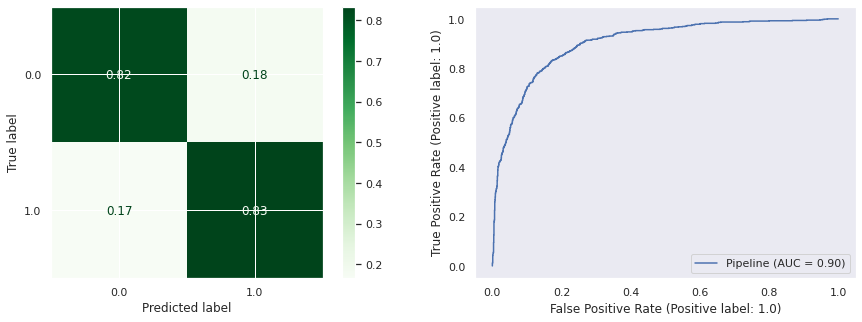

In [180]:
smote = SMOTE()

# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg_pipe = make_pipeline(preprocessor, smote, log_reg)
log_reg_pipe.fit(X_train, y_train)
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

In [181]:
log_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [182]:
#create and visualize our parameter grid
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
              'logisticregression__penalty': ['l1', 'l2'],
              }

In [183]:
model = log_reg_pipe 

# optimize for recall

log_reg_pipe_grid_search = GridSearchCV(model, param_grid, scoring = 'recall', cv=5)   

In [184]:
%%time
log_reg_pipe_grid_search.fit(X_train, y_train)

CPU times: user 9.32 s, sys: 10.4 s, total: 19.7 s
Wall time: 10.8 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7fd0>)])),
                                       ('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100, 1000,
                                                   10000],
                         'logisticregression__penalty': ['l1', 'l2']},
             scoring='recall')

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86      1723
         1.0       0.66      0.85      0.74       777

    accuracy                           0.82      2500
   macro avg       0.79      0.83      0.80      2500
weighted avg       0.84      0.82      0.82      2500



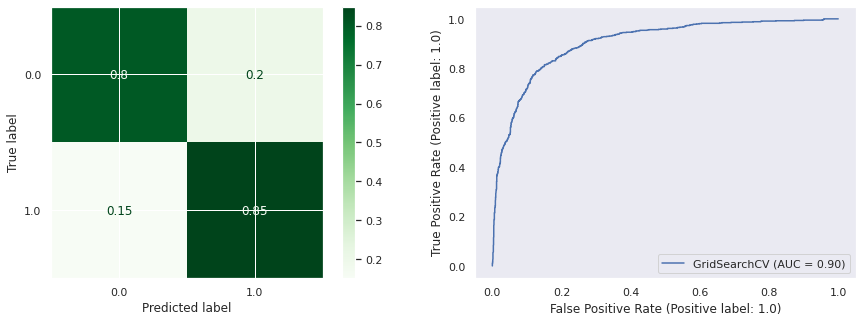

In [185]:
evaluate_classiffication(log_reg_pipe_grid_search, X_test, y_test, label="Test Data")  

# Feature Engineering

I ran this workbook like 87 times and found that the logistic regression classificaiton model worked about as well as any other and much faster to boot.  Due to the data, feature engineering isn't going to do much for us.  However, I will run one last model here with PCA to see if I get any pick up in speed.

In [186]:
from sklearn.decomposition import PCA

# Instantiate & fit data using PCA
pca = PCA(n_components=.95)

Best Log Reg PCA
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86      1723
         1.0       0.67      0.82      0.74       777

    accuracy                           0.82      2500
   macro avg       0.79      0.82      0.80      2500
weighted avg       0.83      0.82      0.82      2500



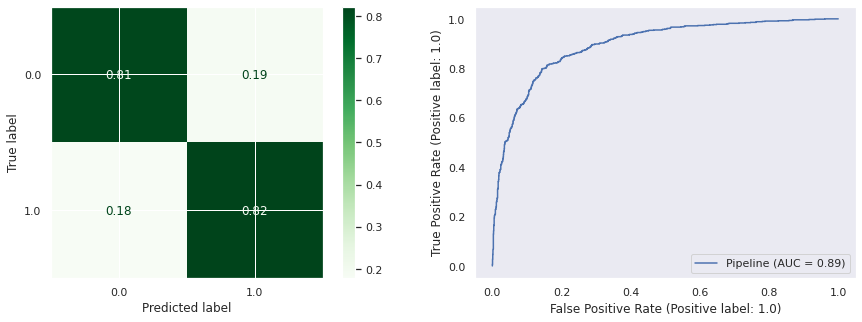

CPU times: user 643 ms, sys: 331 ms, total: 975 ms
Wall time: 649 ms


In [187]:
%%time
log_reg_pipe = LogisticRegression(C=10, max_iter=1000, solver='liblinear', penalty='l1')
log_reg_pipe = make_pipeline(preprocessor, smote, pca, log_reg)
log_reg_pipe.fit(X_train, y_train)
print("Best Log Reg PCA")
evaluate_classiffication(log_reg_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



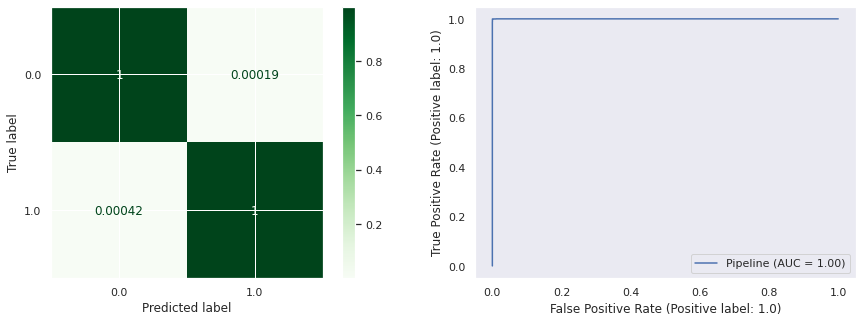

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1723
         1.0       0.76      0.69      0.73       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.80      2500
weighted avg       0.83      0.84      0.83      2500



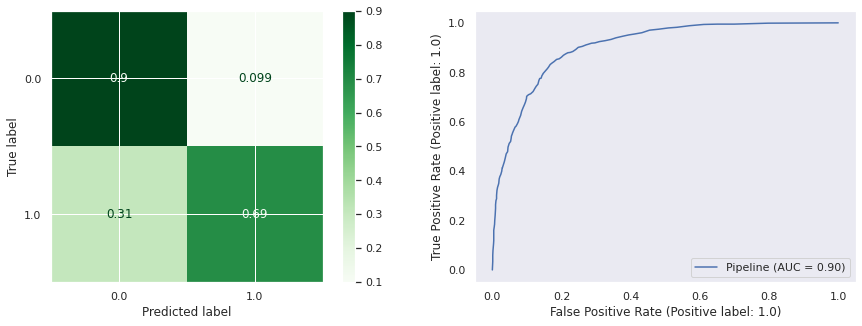

CPU times: user 2.3 s, sys: 35.8 ms, total: 2.33 s
Wall time: 2.33 s


In [188]:
%%time
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      1723
         1.0       0.74      0.72      0.73       777

    accuracy                           0.84      2500
   macro avg       0.81      0.80      0.81      2500
weighted avg       0.83      0.84      0.83      2500



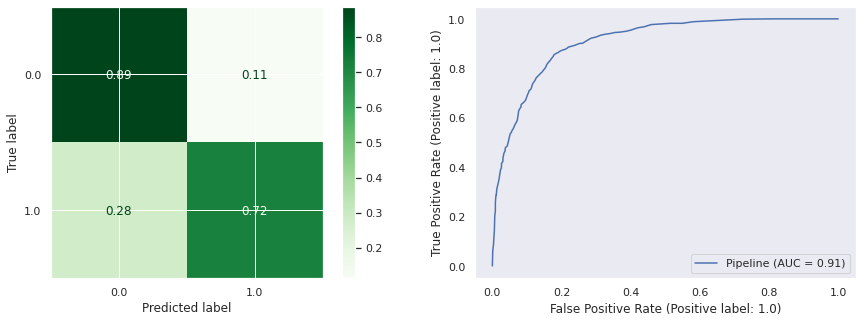

In [189]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, smote, rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1723
         1.0       0.73      0.73      0.73       777

    accuracy                           0.83      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.83      0.83      0.83      2500



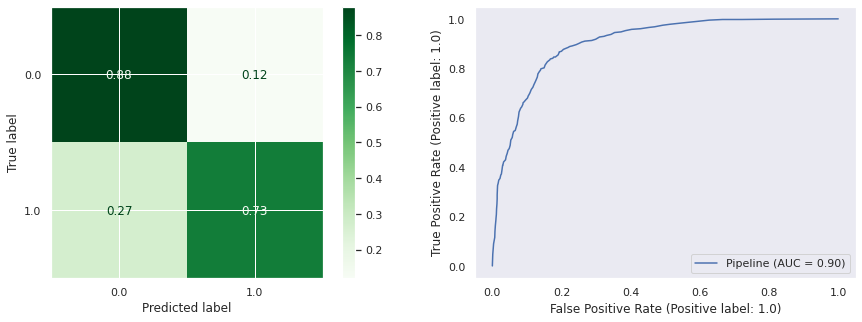

In [190]:
# fit and evaluate a RandomForestClassifier
rf = RandomForestClassifier()
rf_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf)
rf_pipe.fit(X_train, y_train)
evaluate_classiffication(rf_pipe, X_test, y_test, label="Test Data")

In [191]:
rf_tune = RandomForestClassifier()
rf_tune_pipe = make_pipeline(preprocessor, RandomOverSampler(), rf_tune)

In [192]:
rf_tune_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [193]:
#create and visualize our parameter grid
param_grid = {'randomforestclassifier__max_depth': [40,50, 60, 70, 80, 90, 100, 200],
              'randomforestclassifier__n_estimators': [50,100, 200, 500],
              'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,10,20],
              'randomforestclassifier__min_samples_split': [ 5, 10, 15, 20]
              }

# I ran this a few times and tinkered with the params.  Running the fit took over 30 minutes so I narrowed the params based on the long run.

In [194]:
model = rf_tune_pipe  
rf_tune_pipe_grid_search = GridSearchCV(model, param_grid)   

In [195]:
%%time
rf_tune_pipe_grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [196]:


#retrieve the best version of the model
best_model_rf = rf_tune_pipe_grid_search.best_estimator_

#refit the model on the whole training set
best_model_rf.fit(X_train, y_train)

#score the model on the test set
best_model_rf.score(X_test, y_test)

AttributeError: ignored

In [ ]:
best_model_rf.get_params()

In [197]:
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")

NameError: ignored

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1723
         1.0       0.72      0.66      0.69       777

    accuracy                           0.81      2500
   macro avg       0.78      0.77      0.78      2500
weighted avg       0.81      0.81      0.81      2500



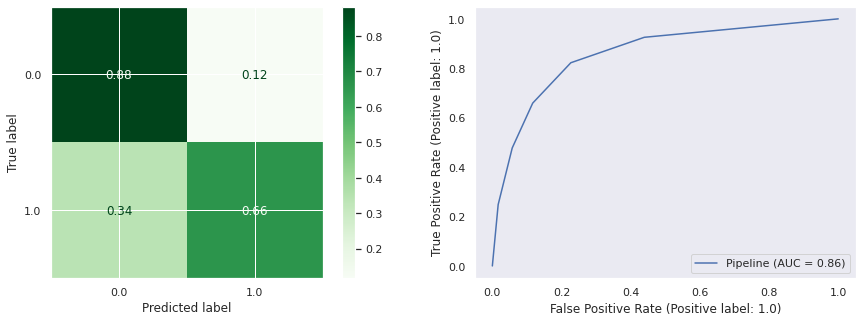

In [198]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
#evaluate_classiffication(knn_pipe, X_train, y_train, label="Train Data")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1723
         1.0       0.61      0.79      0.69       777

    accuracy                           0.78      2500
   macro avg       0.75      0.78      0.76      2500
weighted avg       0.80      0.78      0.79      2500



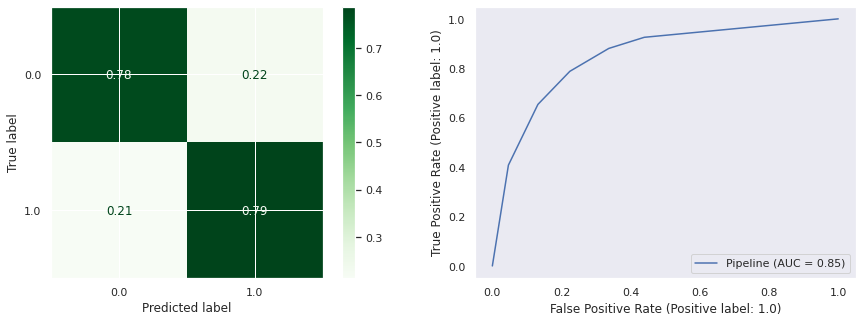

In [199]:
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, RandomOverSampler(), knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1723
         1.0       0.61      0.79      0.69       777

    accuracy                           0.78      2500
   macro avg       0.75      0.78      0.76      2500
weighted avg       0.80      0.78      0.79      2500



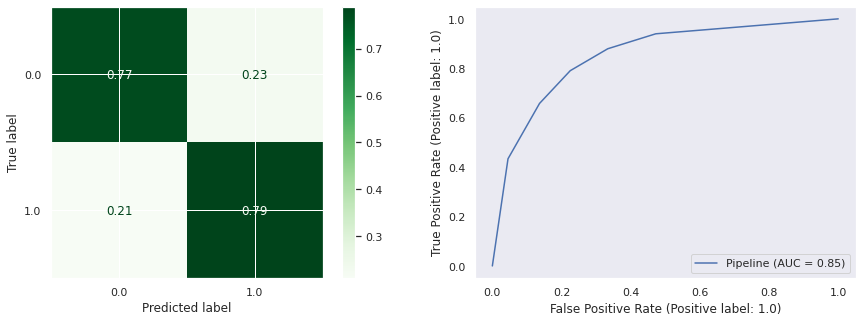

CPU times: user 1.63 s, sys: 293 ms, total: 1.92 s
Wall time: 1.6 s


In [200]:
%%time
# fit and evaluate a KNeighborsClassifier
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, smote, knn)
knn_pipe.fit(X_train, y_train)
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")

In [201]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [202]:
%%time
model = knn_pipe

param_grid = {'kneighborsclassifier__n_neighbors': range(2,10),
              'kneighborsclassifier__leaf_size': range(10,50),
              }

knn_tune_pipe_grid_search = GridSearchCV(model, param_grid, scoring = 'recall', cv=5)   

CPU times: user 43 µs, sys: 3 µs, total: 46 µs
Wall time: 50.5 µs


In [203]:
knn_tune_pipe_grid_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                              

In [204]:
model = KNeighborsClassifier(n_neighbors=5,leaf_size=30, p=2  )
knn_pipe_best = make_pipeline(preprocessor, smote, model)
knn_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7fd0>)])),
                ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Original KNN Untuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1723
         1.0       0.61      0.79      0.69       777

    accuracy                           0.78      2500
   macro avg       0.75      0.78      0.76      2500
weighted avg       0.80      0.78      0.79      2500



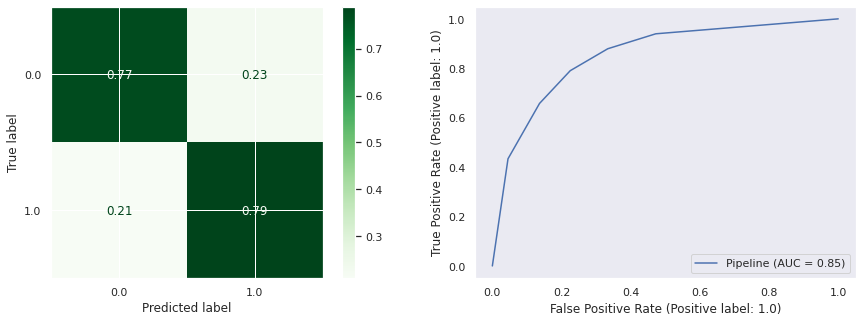

Best KNN Tuned
------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1723
         1.0       0.62      0.80      0.70       777

    accuracy                           0.79      2500
   macro avg       0.76      0.79      0.77      2500
weighted avg       0.81      0.79      0.79      2500



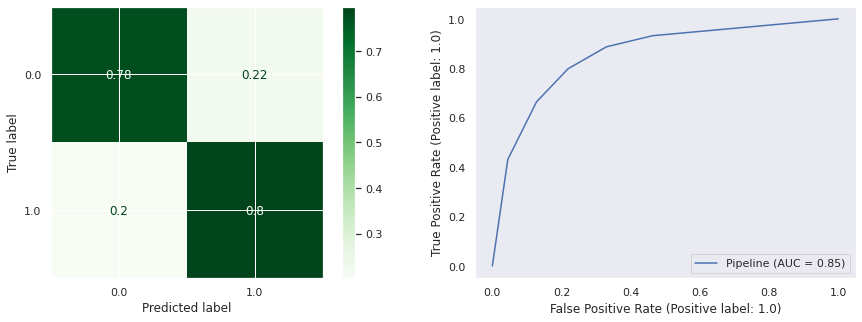

In [205]:
print("Original KNN Untuned")
evaluate_classiffication(knn_pipe, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1723
         1.0       0.77      0.72      0.74       777

    accuracy                           0.85      2500
   macro avg       0.82      0.81      0.82      2500
weighted avg       0.84      0.85      0.84      2500



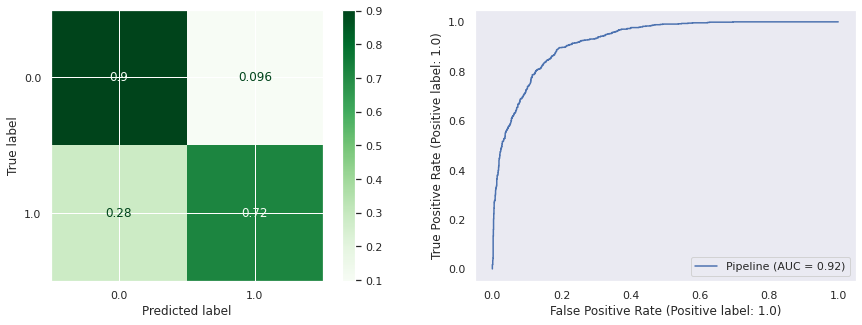

CPU times: user 789 ms, sys: 12.7 ms, total: 802 ms
Wall time: 794 ms


In [206]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(xgb_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      1723
         1.0       0.73      0.80      0.76       777

    accuracy                           0.85      2500
   macro avg       0.82      0.83      0.83      2500
weighted avg       0.85      0.85      0.85      2500



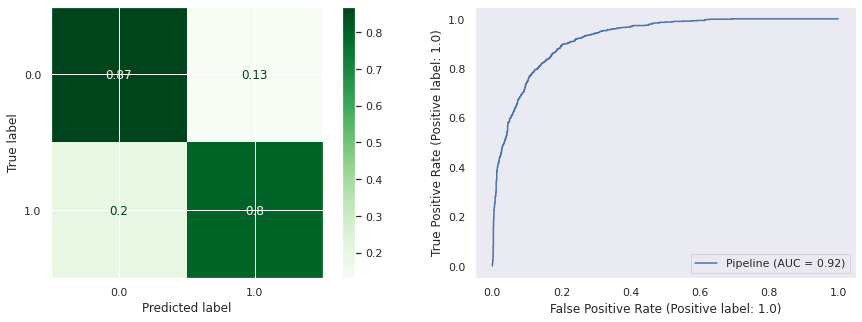

CPU times: user 1.06 s, sys: 117 ms, total: 1.17 s
Wall time: 1.04 s


In [207]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, smote, xgb)
xgb_pipe.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88      1723
         1.0       0.71      0.84      0.77       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.86      0.84      0.85      2500



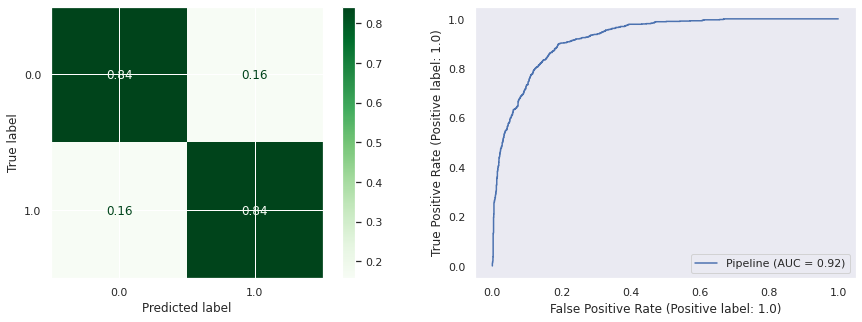

CPU times: user 900 ms, sys: 10.8 ms, total: 911 ms
Wall time: 909 ms


In [208]:
%%time
# Instantiate and fit gradient boosting classifier

xgb = XGBClassifier()
xgb_pipe_over = make_pipeline(preprocessor, RandomOverSampler(), xgb)
xgb_pipe_over.fit(X_train, y_train)
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1723
         1.0       0.76      0.75      0.76       777

    accuracy                           0.85      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.85      0.85      0.85      2500



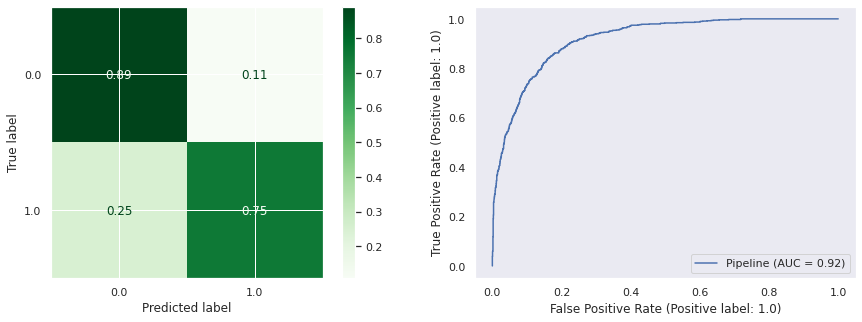

CPU times: user 576 ms, sys: 10.6 ms, total: 587 ms
Wall time: 582 ms


In [209]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(lgbm_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      1723
         1.0       0.74      0.77      0.75       777

    accuracy                           0.84      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.85      0.84      0.85      2500



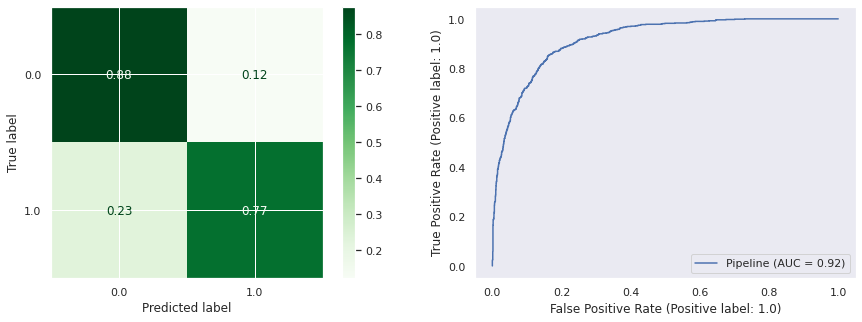

CPU times: user 896 ms, sys: 115 ms, total: 1.01 s
Wall time: 897 ms


In [210]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor,smote, lgbm)
lgbm_pipe.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      1723
         1.0       0.72      0.82      0.77       777

    accuracy                           0.84      2500
   macro avg       0.82      0.84      0.82      2500
weighted avg       0.85      0.84      0.85      2500



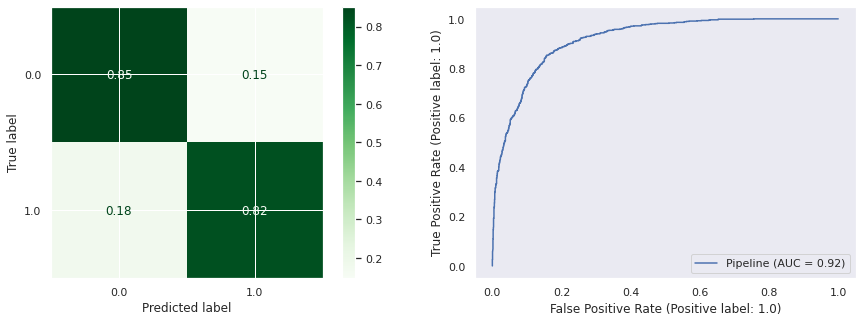

CPU times: user 659 ms, sys: 18.6 ms, total: 678 ms
Wall time: 672 ms


In [211]:
%%time
# Instantiate and fit gradient boosting classifier

lgbm = LGBMClassifier()

lgbm_pipe_over = make_pipeline(preprocessor,RandomOverSampler(), lgbm)
lgbm_pipe_over.fit(X_train, y_train)
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1723
         1.0       0.78      0.72      0.75       777

    accuracy                           0.85      2500
   macro avg       0.83      0.81      0.82      2500
weighted avg       0.85      0.85      0.85      2500



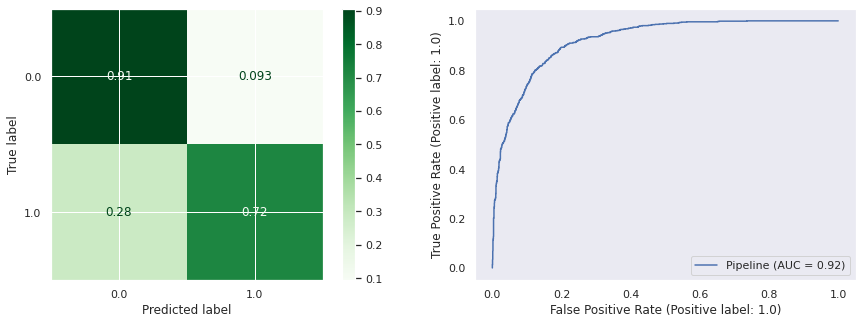

CPU times: user 1.21 s, sys: 15.5 ms, total: 1.23 s
Wall time: 1.24 s


In [212]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      1723
         1.0       0.78      0.72      0.75       777

    accuracy                           0.85      2500
   macro avg       0.83      0.81      0.82      2500
weighted avg       0.85      0.85      0.85      2500



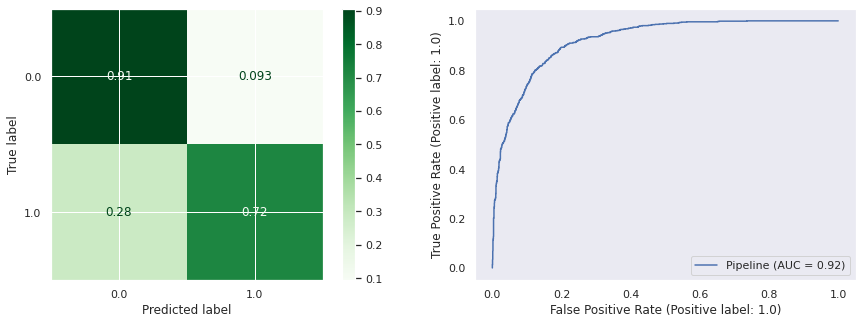

CPU times: user 1.23 s, sys: 8.87 ms, total: 1.24 s
Wall time: 1.24 s


In [213]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe = make_pipeline(preprocessor, gbc)
gbc_pipe.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe, X_train, y_train, label="Train Data")

------------------------------------------------------------
CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.83      0.88      1723
         1.0       0.70      0.85      0.76       777

    accuracy                           0.84      2500
   macro avg       0.81      0.84      0.82      2500
weighted avg       0.85      0.84      0.84      2500



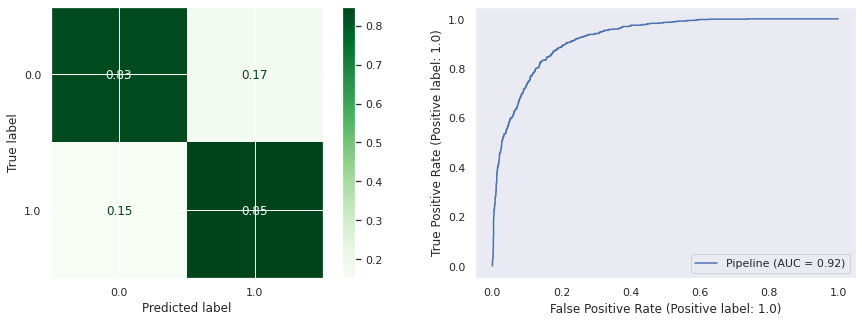

CPU times: user 1.5 s, sys: 9.82 ms, total: 1.51 s
Wall time: 1.5 s


In [214]:
%%time
# Instantiate and fit gradient boosting classifier
gbc = GradientBoostingClassifier()

gbc_pipe_over = make_pipeline(preprocessor, RandomOverSampler(),gbc)
gbc_pipe_over.fit(X_train, y_train)
evaluate_classiffication(gbc_pipe_over, X_test, y_test, label="Test Data")
#evaluate_classiffication(gbc_pipe_over, X_train, y_train, label="Train Data")

In [215]:
gbc_pipe_over.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f66fe4b7290>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                 

In [216]:
#create and visualize our parameter grid
param_grid = {'gradientboostingclassifier__max_depth': [2,3,4],
              'gradientboostingclassifier__min_samples_split': [2,3, 4, 5],
              'gradientboostingclassifier__n_estimators': [90,100,110]
              }


In [217]:
model = gbc_pipe_over
gbc_pipe_over_grid_search = GridSearchCV(model, param_grid, scoring = 'recall', cv=5)  

In [218]:
%%time
# Instantiate and fit gradient boosting classifier
gbc_pipe_over_grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [220]:
#retrieve the best version of the model
best_model_gbc = gbc_pipe_over_grid_search.best_estimator_

#refit the model on the whole training set
best_model_gbc.fit(X_train, y_train)

#score the model on the test set
best_model_gbc.score(X_test, y_test)

best_model_gbc.get_params()

AttributeError: ignored

In [221]:
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")
#evaluate_classiffication(best_model_gbc, X_train, y_train, label="Train Data")

NameError: ignored

In [ ]:
print("Best Log Reg Tuned")
evaluate_classiffication(log_reg_pipe_grid_search, X_test, y_test, label="Test Data")
print("Best Random Forest Tuned")
evaluate_classiffication(best_model_rf, X_test, y_test, label="Test Data")
print("Best KNN Tuned")
evaluate_classiffication(knn_pipe_best, X_test, y_test, label="Test Data")


In [ ]:
evaluate_classiffication(xgb_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(lgbm_pipe_over, X_test, y_test, label="Test Data")
evaluate_classiffication(gbc_pipe_over, X_test,  y_test, label="Test Data")
evaluate_classiffication(best_model_gbc, X_test, y_test, label="Test Data")


## Summary of Classification

I ran multiple classification and gradient boosting models to find the best one.  The most important factor we were optimizing for was recall.  Not predicting an accident is much more expensive than missing out on a potential customer.  

Based on accuracy and recall, logistic regression (classification) and some of the gradient boosting models worked about equally at ~.84 accuracy and .15 false negative rate.  

I chose the logistic regression model due to its very competitive accuracy and recall and very quick processing time.

# Clustering

In [281]:
# Imports
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [282]:
df_ml = df_clean.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [283]:
fill_credit_score(df_ml)
fill_mileage(df_ml)


In [284]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  int64  
 2   RACE                 10000 non-null  int64  
 3   DRIVING_EXPERIENCE   10000 non-null  int64  
 4   EDUCATION            10000 non-null  int64  
 5   INCOME               10000 non-null  int64  
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  int64  
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  int64  
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [285]:
#df_ml = df_ml.drop(columns = {'GENDER', 'RACE', 'POSTAL_CODE'})


In [286]:
#instantiate the StandardScaler, OneHotEncoder, and Imputers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Setup the pipelines for the numeric and categorical data

num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(freq_imputer, ohe)

# Selectors
num_selector = make_column_selector(dtype_include='number')
nom_selector = make_column_selector(dtype_include='object')

# Setup the tuples to pair the processors with the make column selectors

numeric_tuple = (num_pipeline, num_selector)
nominal_tuple = (nom_pipeline, nom_selector)

# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       nominal_tuple,
                                       remainder='drop') 

# Fit the column transformer on the X_train
preprocessor.fit(df_ml)

# Transform the X_train and the X_test

df_ml_transformed = preprocessor.transform(df_ml)

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(df_ml_transformed).sum().sum(), 'missing values in training data')
print('\n')
print('All data in df_ml_transformed are', df_ml_transformed.dtype)
print('\n')
print('shape of data is', df_ml_transformed.shape)
print('\n')
df_ml_transformed

0 missing values in training data


All data in df_ml_transformed are float64


shape of data is (10000, 18)




array([[ 1.4733327 ,  0.998002  , -0.33110663, ..., -0.43102013,
        -0.63926317, -0.67545539],
       [-1.45284943, -1.002002  , -0.33110663, ..., -0.43102013,
        -0.63926317,  1.48048266],
       [-1.45284943,  0.998002  , -0.33110663, ..., -0.43102013,
        -0.63926317, -0.67545539],
       ...,
       [-0.47745538, -1.002002  , -0.33110663, ..., -0.43102013,
        -0.63926317, -0.67545539],
       [-0.47745538,  0.998002  , -0.33110663, ..., -0.43102013,
        -0.03407225,  1.48048266],
       [-0.47745538,  0.998002  , -0.33110663, ..., -0.43102013,
        -0.63926317, -0.67545539]])

In [287]:
min_samples = 30
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(df_ml_transformed)
distances, indices = neighbors.kneighbors(df_ml_transformed)
distances[:5]

array([[0.        , 0.40436612, 0.55607902, 0.77283934, 1.12814567,
        1.13097404, 1.17513431, 1.23618655, 1.31330744, 1.40825802,
        1.41155441, 1.41537109, 1.43776896, 1.53931976, 1.56741706,
        1.56837477, 1.60602324, 1.67417122, 1.68622531, 1.71436341,
        1.7146867 , 1.75870746, 1.80358587, 1.84130044, 1.85337783,
        1.85990009, 1.8783815 , 1.89471897, 1.95924841, 1.96987334],
       [0.        , 0.04382093, 0.36186543, 0.37154536, 0.37681105,
        0.37681105, 0.38236542, 0.41164724, 0.47772302, 0.52083229,
        0.56118831, 0.62013794, 0.63711931, 0.67580143, 0.7371392 ,
        0.74080996, 0.74080996, 0.76866019, 0.79435863, 0.84714099,
        0.86046057, 0.87723869, 0.89967874, 0.98910653, 1.06491301,
        1.06953336, 1.07174725, 1.10761942, 1.10761942, 1.19590018],
       [0.        , 0.45373028, 0.71746796, 1.04291379, 1.12848269,
        1.25460442, 1.25704361, 1.25764135, 1.34454642, 1.39119575,
        1.40032951, 1.41117352, 1.42380454, 1.

In [288]:
sorted_distances = np.sort(distances[:, min_samples-1])

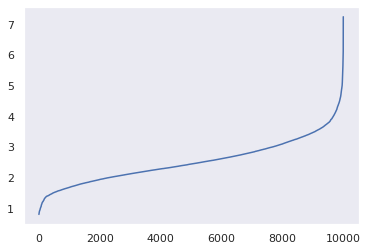

In [289]:
plt.plot(sorted_distances)
plt.grid();

In [300]:
# Instantiate & fit clustering - this is done in one step for DBSCAN
dbs = DBSCAN(eps = 3.0
             , min_samples = min_samples).fit(df_ml_transformed)

dbs.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [301]:
df_ml['cluster'] = dbs.labels_

In [302]:
cluster_groups = df_ml.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,-1,1.632600,0.386805,0.350582,1.307891,1.103493,1.815006,0.498260,0.553687,0.324709,0.465718,0.618370,37265.467012,11469.300175,0.423027,2.542044,0.574386,1.426908,0.357050
1,0,1.483071,0.502791,0.000000,1.062136,1.226715,1.916656,0.517365,0.705073,0.307826,0.497830,0.687337,16010.628054,11705.467441,0.000000,1.444872,0.225350,1.065732,0.307950
2,1,2.000000,0.549296,0.000000,1.399061,1.539906,2.638498,0.578898,0.915493,0.366197,0.793427,0.929577,92101.000000,11338.750563,0.000000,1.366197,0.126761,0.685446,0.183099
3,2,1.345886,0.553696,1.000000,0.881450,0.907950,1.609484,0.492746,0.688982,0.238494,0.447699,0.697350,15562.230126,11921.435919,0.000000,0.984658,0.122734,0.799163,0.347280
4,3,1.726667,0.713333,0.000000,1.146667,1.440000,2.500000,0.571295,0.926667,0.293333,0.760000,0.900000,14889.786667,10895.708667,1.000000,1.320000,0.100000,0.933333,0.060000
5,4,0.297619,0.428571,0.000000,0.190476,0.880952,0.571429,0.398348,0.345238,0.083333,0.047619,0.416667,92101.000000,13549.020012,0.000000,0.226190,0.011905,0.095238,0.916667


In [303]:
df_ml['cluster'].value_counts()

 0    8063
-1     773
 2     717
 1     213
 3     150
 4      84
Name: cluster, dtype: int64

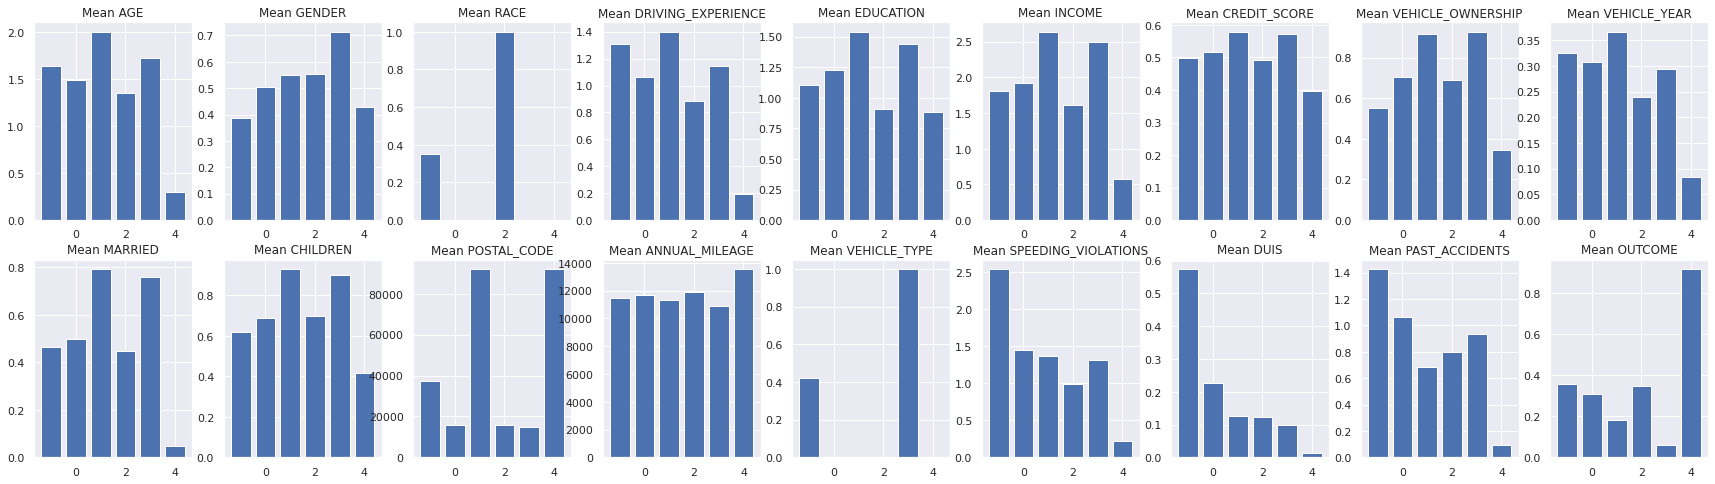

In [304]:
# Visualize means 
fig, axes = plt.subplots(2,9, figsize = (30, 8))
# fig is an array of dimensions 3,3.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

# Analysis of the Clustering

Age and driving experience are the driving factors in predicting whether or not someone will have an accident.  That is, the older and more experience one has driving, the lower the probability that one will have an accident.  

As I noted before, as you get older, your income, credit score, chance of being married, children, etc all go up. However, so does your number of speeding violations, DUIs, and past accidents. I would recommend that the insurance company limit these items to a limited look back - i.e. violations drop off your record after a certain amount of years. 

Gender, race, and vehicle type seem to have little correlation with wrecking your car.  However, I left them in the analysis due to a couple of interesting findings.  

First, adding race functionally duplicated certain clusters without adding much additional value. I ran this clustering several times and sometimes I got four columns, one older white people, one older minority, one young white people, one younger minority people.  I could safely drop race and see if that changes anything.

Here, all the young people are clustered in cluster 3.  They have little driving experience, don't own their car, and have alots of insurance claims. They also live in teh same postal code as cluster 1 who I suspect are largely their parents!

The clusters I think are intersting are 4 and "unclustered."  Both are older, higher income, and more driving experience.  Interestingly, they both drive sports cars.  However, they are very different.  Cluster 4 are responsible, married, and have low accident rates.  The 'Unclustered" are unmarried, have lots of DUIs, speeding tickets, and accidents.  I call this the mid-life crisis "cluster."  